In [1]:
from amalearn.environment import MutliArmedBanditEnvironment
from thompson_sampling_agent import ThompsonSamplingAgent
from amalearn.reward import GaussianReward
from UCB_agent import UCBAgent
from epsilon_greedy_agent import EpsilonGreedyAgent

import numpy as np 
np.random.seed(2)

import matplotlib.pyplot as plt

In [2]:
means = np.random.normal(loc = 0, scale = 1, size=(10,1))
stds = np.ones((10,1))
means

array([[-0.41675785],
       [-0.05626683],
       [-2.1361961 ],
       [ 1.64027081],
       [-1.79343559],
       [-0.84174737],
       [ 0.50288142],
       [-1.24528809],
       [-1.05795222],
       [-0.90900761]])

In [3]:
rewards = [GaussianReward(mean, std) for mean, std in zip(means, stds)]
env = MutliArmedBanditEnvironment(rewards, 1000, '1')


In [4]:
exp_opt_act = max(means) 
opt_act = np.argmax(means)
env.reset()
regret = np.zeros((1000,1))
perc_opt_act = np.zeros((1000,1))
average_rewards = np.zeros((1000,1))

for r in range(20):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 #list(np.zeros(len(rewards),1))
    agent = ThompsonSamplingAgent('1', env)
    for t in range(1000):
        rew , act = agent.take_action()
        
        sum_rewards += rew
        regret[t] += (((t+1)*exp_opt_act - sum_rewards) - regret[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act[t] += ((opt_act_count / (t+1)) - perc_opt_act[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards[t] += ( avg - average_rewards[t]) / (r+1)

    env.reset()

False {}
487:	action=3
{} [0.81759313] False {}
488:	action=3
{} [2.05242312] False {}
489:	action=3
{} [2.63082879] False {}
490:	action=3
{} [0.92471726] False {}
491:	action=3
{} [3.01328972] False {}
492:	action=3
{} [1.41007024] False {}
493:	action=3
{} [3.31277253] False {}
494:	action=3
{} [0.71894959] False {}
495:	action=3
{} [2.00123002] False {}
496:	action=3
{} [1.69807174] False {}
497:	action=3
{} [2.37142728] False {}
498:	action=3
{} [3.24049641] False {}
499:	action=3
{} [3.03370745] False {}
500:	action=3
{} [2.44703744] False {}
501:	action=3
{} [2.56991055] False {}
502:	action=3
{} [0.6000015] False {}
503:	action=3
{} [2.7133309] False {}
504:	action=3
{} [1.9243254] False {}
505:	action=3
{} [0.98452783] False {}
506:	action=3
{} [1.09974268] False {}
507:	action=3
{} [1.32553344] False {}
508:	action=3
{} [2.91563247] False {}
509:	action=3
{} [0.85924162] False {}
510:	action=3
{} [2.06264683] False {}
511:	action=3
{} [0.29957554] False {}
512:	action=3
{} [0

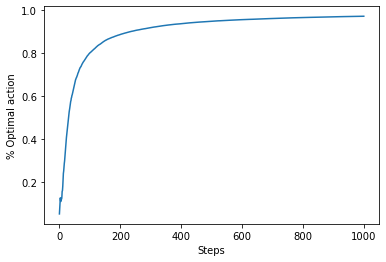

In [13]:
plt.figure()
plt.plot(range(1000),perc_opt_act)
plt.ylabel('% Optimal action',rotation = 90)
plt.xlabel('Steps')
plt.show()

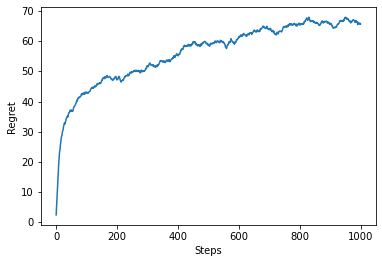

In [14]:
plt.figure()
plt.plot(range(1000),regret)
plt.ylabel('Regret',rotation = 90)
plt.xlabel('Steps')
plt.show()

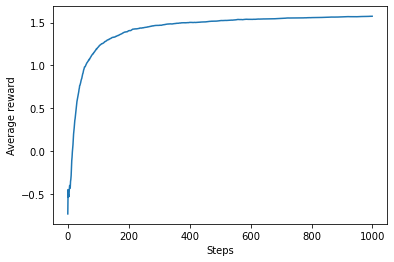

In [15]:
plt.figure()
plt.plot(range(1000),average_rewards)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.show()

# Epsilon Greedy Agent

In [20]:
exp_opt_act = max(means) 
opt_act = np.argmax(means)
env.reset()
regret2 = np.zeros((1000,1))
perc_opt_act2 = np.zeros((1000,1))
average_rewards2 = np.zeros((1000,1))

for r in range(20):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 #list(np.zeros(len(rewards),1))
    agent = EpsilonGreedyAgent('1', env, epsilon=0.1,epsilon_decay=1)
    for t in range(1000):
        rew , act, uti = agent.take_action()
        
        sum_rewards += rew
        regret2[t] += (((t+1)*exp_opt_act - sum_rewards) - regret2[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act2[t] += ((opt_act_count / (t+1)) - perc_opt_act2[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards2[t] += ( avg - average_rewards2[t]) / (r+1)

    env.reset()

.28347466] False {}
488:	action=3
{} [3.03311005] False {}
489:	action=3
{} [1.74571299] False {}
490:	action=3
{} [2.01215366] False {}
491:	action=3
{} [1.68830966] False {}
492:	action=3
{} [1.79721908] False {}
493:	action=3
{} [1.16411791] False {}
494:	action=3
{} [1.75802009] False {}
495:	action=3
{} [0.98630097] False {}
496:	action=3
{} [1.53666999] False {}
497:	action=3
{} [-0.96660474] False {}
498:	action=9
{} [-0.49325355] False {}
499:	action=3
{} [1.13908734] False {}
500:	action=3
{} [0.49476235] False {}
501:	action=3
{} [1.91828676] False {}
502:	action=3
{} [2.00305174] False {}
503:	action=3
{} [0.02873929] False {}
504:	action=3
{} [1.1388355] False {}
505:	action=3
{} [2.85353421] False {}
506:	action=3
{} [-1.26554922] False {}
507:	action=5
{} [0.39004252] False {}
508:	action=3
{} [0.33150814] False {}
509:	action=3
{} [-1.15472012] False {}
510:	action=3
{} [0.38108304] False {}
511:	action=3
{} [1.02168761] False {}
512:	action=3
{} [1.29438107] False {}
51

# UCB Agent

In [21]:
exp_opt_act = max(means) 
opt_act = np.argmax(means)
env.reset()
regret3 = np.zeros((1000,1))
perc_opt_act3 = np.zeros((1000,1))
average_rewards3 = np.zeros((1000,1))

for r in range(20):
    sum_rewards = 0
    opt_act_count = 0
    avg = 0 #list(np.zeros(len(rewards),1))
    agent = UCBAgent('1', env)
    for t in range(1000):
        rew , act, u = agent.take_action()
        
        sum_rewards += rew
        regret3[t] += (((t+1)*exp_opt_act - sum_rewards) - regret3[t]) / (r+1)
        
        opt_act_count += int(act == opt_act)
        perc_opt_act3[t] += ((opt_act_count / (t+1)) - perc_opt_act3[t]) / (r+1)
        
        avg += (rew - avg) / (t+1)
        average_rewards3[t] += ( avg - average_rewards3[t]) / (r+1)

    env.reset()

tion=3
{} [1.71015282] False {}
488:	action=3
{} [-0.26535816] False {}
489:	action=3
{} [2.46870986] False {}
490:	action=3
{} [3.26193516] False {}
491:	action=3
{} [3.16323063] False {}
492:	action=3
{} [1.64774133] False {}
493:	action=3
{} [1.83039842] False {}
494:	action=3
{} [0.73334722] False {}
495:	action=3
{} [1.54189186] False {}
496:	action=3
{} [1.12233892] False {}
497:	action=3
{} [1.32535893] False {}
498:	action=3
{} [1.38794984] False {}
499:	action=3
{} [3.61213986] False {}
500:	action=3
{} [1.98117655] False {}
501:	action=3
{} [1.84780146] False {}
502:	action=3
{} [0.8661874] False {}
503:	action=3
{} [2.12367725] False {}
504:	action=3
{} [0.9679399] False {}
505:	action=3
{} [2.56843287] False {}
506:	action=3
{} [0.19807869] False {}
507:	action=3
{} [1.70084236] False {}
508:	action=3
{} [3.19421797] False {}
509:	action=3
{} [1.19395676] False {}
510:	action=3
{} [2.55996063] False {}
511:	action=3
{} [2.91291134] False {}
512:	action=3
{} [2.85770583] Fal

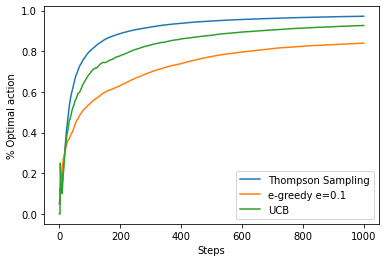

In [24]:
plt.figure()
plt.plot(range(1000),perc_opt_act)
plt.plot(range(1000),perc_opt_act2)
plt.plot(range(1000),perc_opt_act3)
plt.ylabel('% Optimal action',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("Thompson Sampling","e-greedy e=0.1","UCB"))
plt.show()

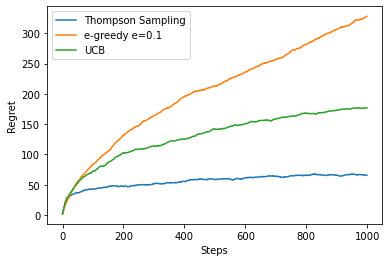

In [25]:
plt.figure()
plt.plot(range(1000),regret)
plt.plot(range(1000),regret2)
plt.plot(range(1000),regret3)
plt.ylabel('Regret',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("Thompson Sampling","e-greedy e=0.1","UCB"))
plt.show()

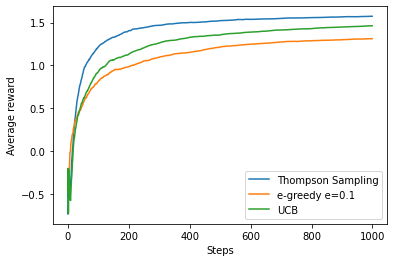

In [26]:
plt.figure()
plt.plot(range(1000),average_rewards)
plt.plot(range(1000),average_rewards2)
plt.plot(range(1000),average_rewards3)
plt.ylabel('Average reward',rotation = 90)
plt.xlabel('Steps')
plt.legend(loc="best",labels=("Thompson Sampling","e-greedy e=0.1","UCB"))
plt.show()